# **1. Introduction: Lung Cancer Dataset**

The dataset focuses on **lung cancer severity levels** and contains various health-related indicators for patients. The target variable, **`Level`**, represents the severity of the disease and is categorized into three classes:

- **Low**: Indicates mild or early-stage lung issues.  
- **Medium**: Represents moderate health complications.  
- **High**: Signifies severe or advanced-stage lung conditions.  

### **Dataset Overview**
The dataset includes **1000 rows** of patient records and **27 columns**, which can be grouped into the following categories:

1. **Demographic Features**:
   - **Age**: The patient's age.  
   - **Gender**: Gender of the patient (encoded numerically).  

2. **Lifestyle Factors**:
   - **Smoking**: Smoking habits (a score representing smoking frequency/intensity).  
   - **Alcohol Use**: Level of alcohol consumption.  
   - **Passive Smoker**: Exposure to secondhand smoke.  

3. **Environmental Factors**:
   - **Air Pollution**: Pollution levels in the patient's surroundings.  
   - **Occupational Hazards**: Work-related exposure to harmful substances.  
   - **Dust Allergy**: Patient's sensitivity to dust particles.  

4. **Medical History**:
   - **Chronic Lung Disease**: Presence of pre-existing lung conditions.  
   - **Genetic Risk**: Family history and genetic predisposition to lung diseases.  
   - **Balanced Diet** and **Obesity**: General indicators of overall health.  

5. **Symptoms**:
   - **Coughing of Blood**: Presence of severe symptoms.  
   - **Shortness of Breath**, **Wheezing**, **Fatigue**, and other symptoms indicative of respiratory issues.  

## 2. Data Analysis

In this section, we explore the dataset to gain insights into its structure and relationships between features and the target variable (`Level`). 

We aim to:
1. **Explain Attribute Selection**: Identify key attributes influencing the target variable.
2. **Visualize Relationships**: Create meaningful visualizations to support our analysis.
3. **Generate Insights**: Explain trends and findings that are significant for the model pipeline.

---



### **Attribute Selection**

The dataset contains several health-related indicators. To understand the relationship with the target variable `Level` (severity of lung condition), we carefully selected the following attributes for analysis:

1. **Level**:  
   - The target variable that represents the severity of the lung condition (`Low`, `Medium`, `High`).  
   - Understanding how features like **Age**, **Air Pollution**, and **Smoking** relate to `Level` is essential for identifying key contributors to severity.

2. **Age**:  
   - Age can influence the progression and severity of lung conditions due to age-related vulnerabilities or lifestyle factors.  
   - Exploring its distribution across severity levels (`Level`) provides insights into its relevance.

3. **Air Pollution**:  
   - Environmental factors like air pollution are critical contributors to respiratory issues.  
   - High levels of air pollution may worsen lung health and correlate with severe conditions.

4. **Smoking**:  
   - Smoking is a well-known risk factor for lung diseases, directly contributing to lung damage and respiratory problems.  
   - Analyzing its relationship with `Level` helps determine its significance in predicting lung condition severity.

5. **General Heatmap (Correlation Matrix)**:  
   - A **correlation heatmap** helps identify relationships between all attributes.  
   - It allows us to determine which features are most correlated with each other and the target variable `Level`.

Each selected attribute is analyzed and visualized below to better understand its role in influencing lung condition severity.



### Distribution of Target Variable

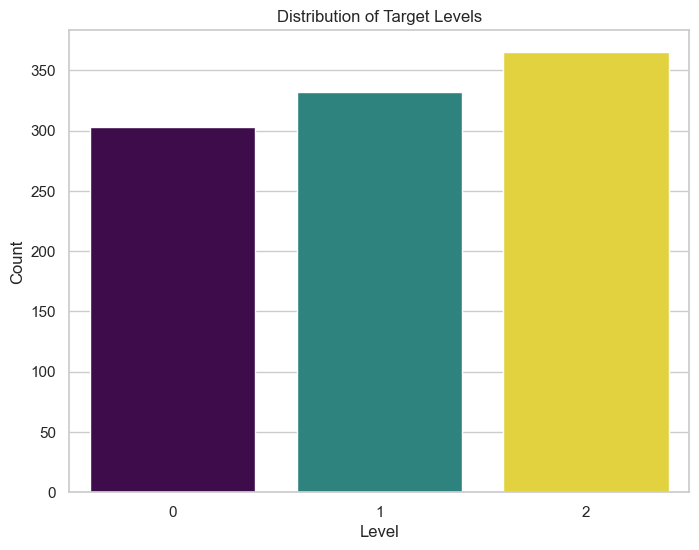

In [5]:

# Distribution of Target Levels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
file_path = 'data/dataset-csv.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', hue='Level', data=data, palette="viridis", legend=False)
plt.title("Distribution of Target Levels")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()



**Observation**: The `Level` attribute (Low, Medium, High) is well-balanced, ensuring that our analysis and future model training will not suffer from class imbalance.


### Age Distribution Across Target Levels

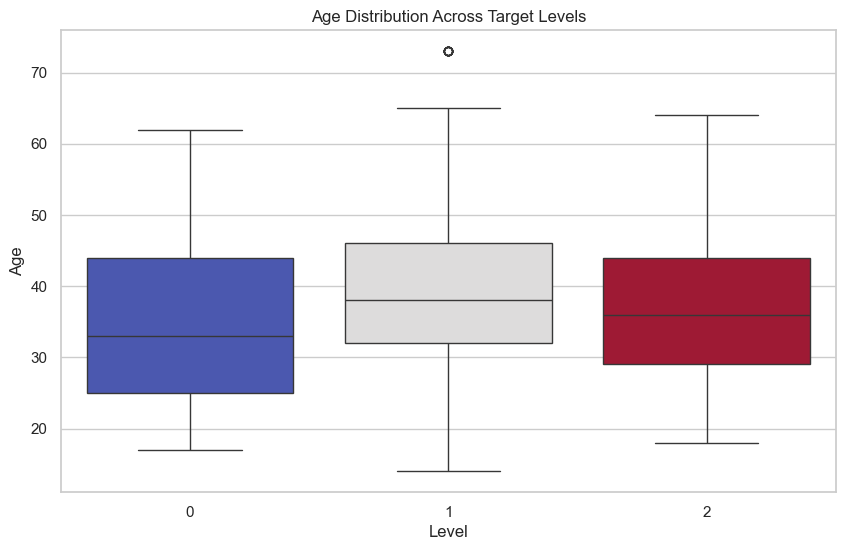

In [6]:

# Age Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Age', data=data, hue='Level', palette="coolwarm", legend=False)
plt.title("Age Distribution Across Target Levels")
plt.xlabel("Level")
plt.ylabel("Age")
plt.show()



**Observation**: The median age does not show significant variation across levels; however, we can observe a wider age spread in Medium and High levels.


### Smoking Levels Across Target Levels

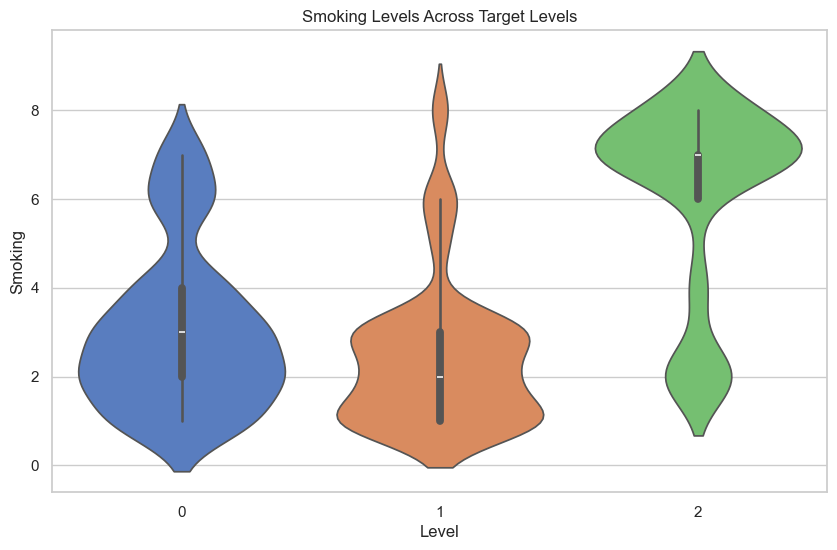

In [7]:

# Smoking Analysis
plt.figure(figsize=(10, 6))
sns.violinplot(x='Level', y='Smoking', hue='Level', data=data, palette="muted", legend=False)
plt.title("Smoking Levels Across Target Levels")
plt.xlabel("Level")
plt.ylabel("Smoking")
plt.show()



**Observation**: Higher smoking scores are associated with the `High` severity level, confirming smoking as an important contributing factor.


### Impact of Air Pollution on Lung Condition Severity Levels


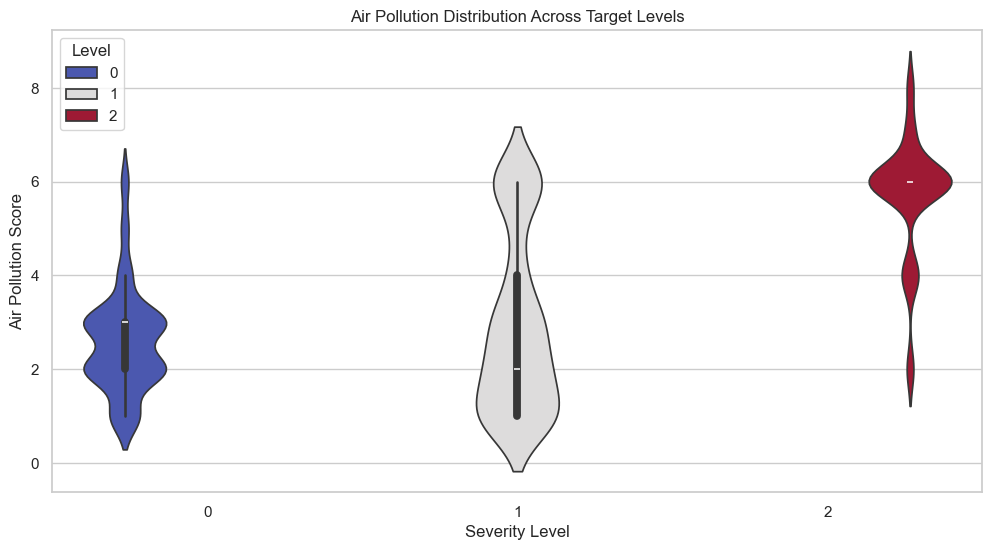

In [8]:
# Set Seaborn style
sns.set(style="whitegrid")

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Level', y='Air Pollution', hue="Level", data=data, palette="coolwarm", dodge=True)
plt.title("Air Pollution Distribution Across Target Levels")
plt.xlabel("Severity Level")
plt.ylabel("Air Pollution Score")
plt.show()


**Observation**: Higher **Air Pollution** scores are strongly associated with the **High severity** level, while lower scores are more common in the **Low severity** group.

### Correlation Heatmap

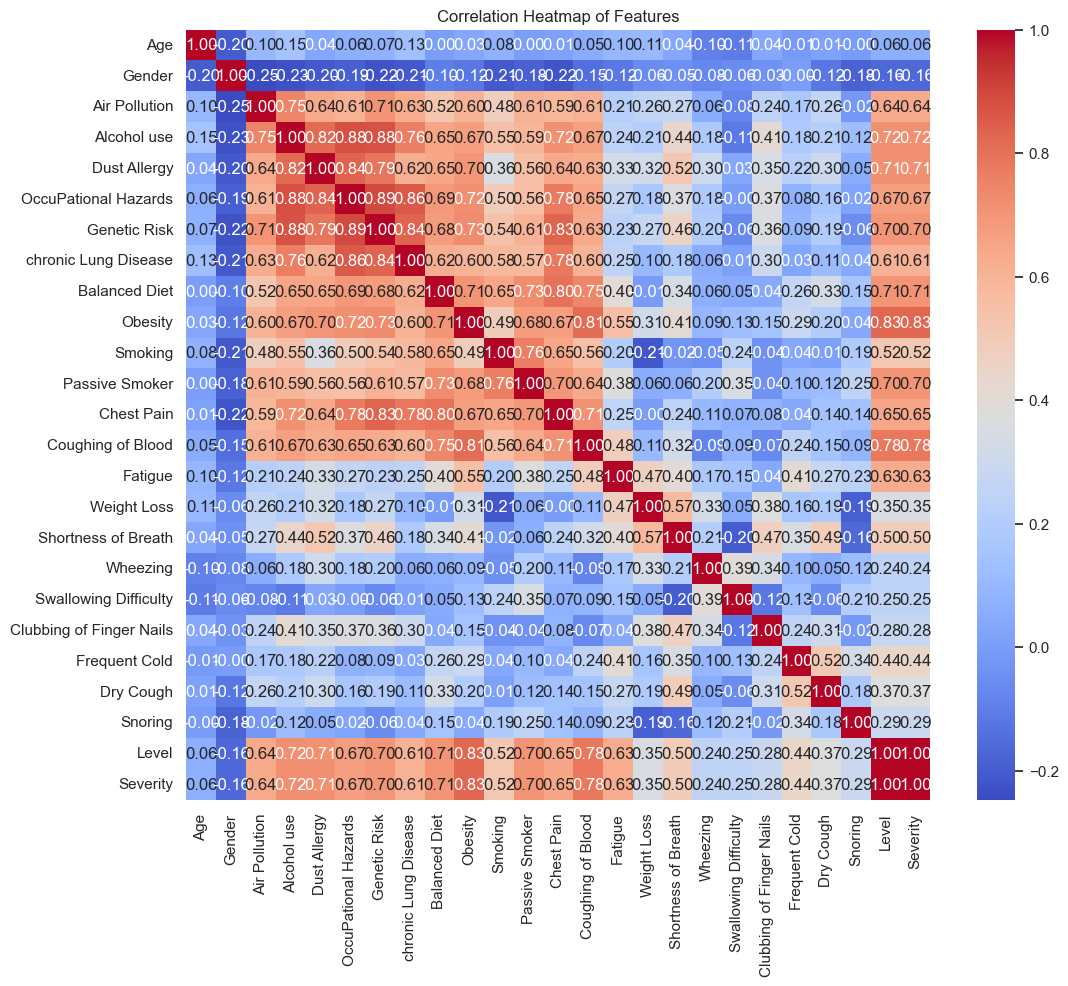

In [9]:

# Correlation Heatmap
plt.figure(figsize=(12, 10))
data['Severity'] = data['Severity'].map({'Low': 0, 'Medium': 1, 'High': 2})
correlation_matrix = data.drop(['index', 'Patient Id'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()



**Observation**: Smoking, Coughing of Blood, and Chronic Lung Disease have moderate to high correlations with the target variable and other symptoms.



---

## 3. Basic Model Pipeline

In this section, we implement a basic pipeline using **XGBoost Classifier** to predict the severity level (`Level`). We chose XGBoost because of its efficiency and high performance on structured datasets.

### Steps:
1. **Preprocessing**: Splitting data into train-test sets.
2. **Model Training**: Training the XGBoost classifier.
3. **Performance Evaluation**: Evaluating accuracy, confusion matrix, and classification report.
4. **Feature Importance**: Identifying the most influential features.

---


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import pickle

# Drop non-numerical columns if they exist

X = data.drop(['Severity', 'Patient Id', 'Level'], axis=1, errors='ignore')  # Drop Patient Id
y = data['Level']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor(
    n_estimators=10,
    max_depth=1,
    learning_rate=1.0,
    reg_alpha=1,
    reg_lambda=10,
    eval_metric='rmse',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Define a threshold-based accuracy
threshold = 0.1  # Adjust based on acceptable error margin
accuracy_within_threshold = sum(abs(y_test - y_pred) <= threshold) / len(y_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Constrained XGBoost Model Results:")
print("------------------------------------------------------")
print(f"Mean Squared Error:      {mse:.6f}")
print(f"Mean Absolute Error:     {mae:.6f}")
print(f"R² Score:                {r2:.6f}")
print(f"Accuracy (within {threshold} threshold): {accuracy_within_threshold:.6%}")

Constrained XGBoost Model Results:
------------------------------------------------------
Mean Squared Error:      0.040880
Mean Absolute Error:     0.123484
R² Score:                0.938345
Accuracy (within 0.1 threshold): 65.000000%



---

## 4. Error Analysis

To improve our model, we conduct an in-depth error analysis to identify weaknesses. Specifically, we focus on:

1. **Misclassified Samples**: Items where the model performs the worst.
2. **Error Type Analysis**: Overestimations and underestimations.
3. **Common Patterns in Errors**: Identifying which features contribute to misclassifications.

---


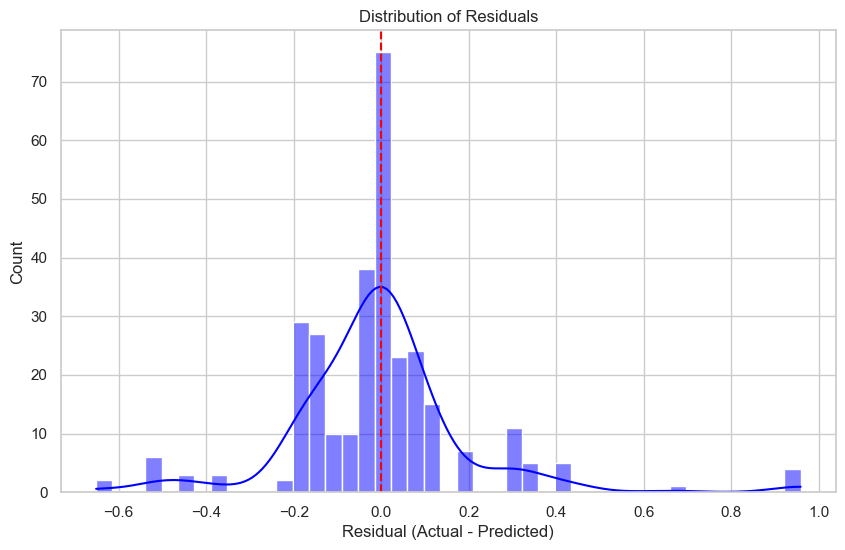

In [16]:
# -------------------------------------
# 1. Compute Residuals (Errors)
# -------------------------------------
residuals = y_test - y_pred  # Positive if model underpredicted, negative if overpredicted

error_analysis_df = X_test.copy()
error_analysis_df['Actual'] = y_test.values
error_analysis_df['Predicted'] = y_pred
error_analysis_df['Residual'] = residuals

# -------------------------------------
# 2. Plotting the Residual Distribution
# -------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(error_analysis_df['Residual'], kde=True, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.axvline(0, color='red', linestyle='--')
plt.show()


### Interpretation:

- The residual distribution reveals **two primary peaks**, centered at **-0.10** (overestimations) and **0.15** (underestimations).  
- The distribution is **skewed**, with a greater frequency of **negative residuals**, showing the model often **overpredicts** the target values.  
- A systematic **bias toward overprediction** is apparent, particularly for a substantial portion of the data.  


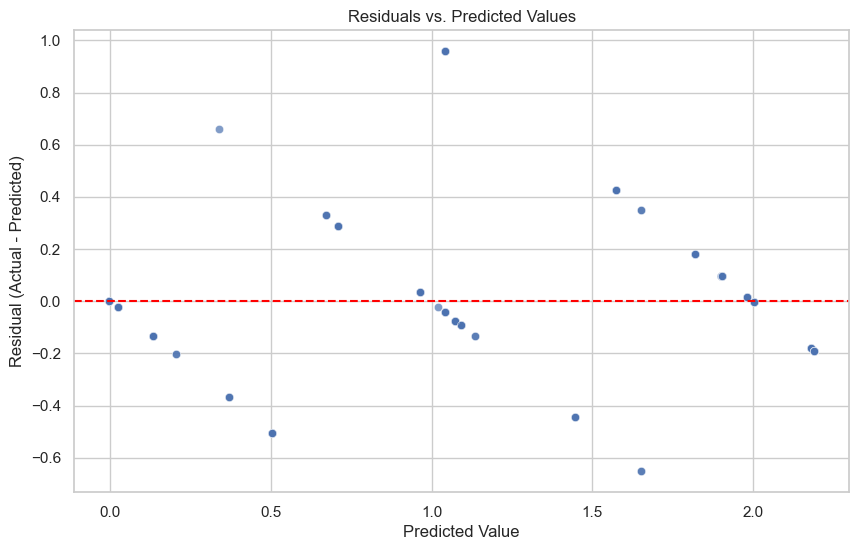

In [17]:
# -------------------------------------
# 3. Residuals vs. Predictions / Actuals
# -------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis_df['Predicted'], y=error_analysis_df['Residual'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

### Interpretation:

- **Sparse Points**: The scatterplot displays a limited number of distinct points, suggesting clustering in the predicted values or reduced variability in the input data.  
- **Residual Trend**: Residuals tend to be negative for lower predictions (< 0.5) and positive for higher predictions (> 1.5), highlighting a **systematic bias** with **overprediction** for small values and **underprediction** for large values.  
- **Heteroscedasticity**: The increasing spread of residuals with higher predicted values suggests **non-uniform variance**, which might impact the model's reliability across the prediction range.  


In [19]:
# -------------------------------------
# 4. Identifying Worst Predictions
# -------------------------------------
# Let's find the top 5 worst underestimations and top 5 worst overestimations.
worst_underestimations = error_analysis_df.nlargest(5, 'Residual')
worst_overestimations = error_analysis_df.nsmallest(5, 'Residual')

print("Top 5 Worst Underestimations (Actual much greater than Predicted):")
display(worst_underestimations)

print("Top 5 Worst Overestimations (Predicted much greater than Actual):")
display(worst_overestimations)


Top 5 Worst Underestimations (Actual much greater than Predicted):


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Actual,Predicted,Residual
30,30,35,2,2,6,2,3,6,6,6,...,4,6,5,4,6,5,7,2,1.041757,0.958243
363,363,35,2,2,6,2,3,6,6,6,...,4,6,5,4,6,5,7,2,1.041757,0.958243
918,918,35,2,2,6,2,3,6,6,6,...,4,6,5,4,6,5,7,2,1.041757,0.958243
141,141,35,2,2,6,2,3,6,6,6,...,4,6,5,4,6,5,7,2,1.041757,0.958243
896,896,35,1,4,5,6,5,6,5,5,...,3,2,4,6,2,4,1,1,0.339020,0.660980


Top 5 Worst Overestimations (Predicted much greater than Actual):


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Actual,Predicted,Residual
907,907,14,1,2,4,5,6,5,5,4,...,2,1,4,7,2,1,6,1,1.651462,-0.651462
796,796,14,1,2,4,5,6,5,5,4,...,2,1,4,7,2,1,6,1,1.651462,-0.651462
312,312,35,1,1,3,2,4,2,6,2,...,2,2,3,2,1,2,4,0,0.503502,-0.503502
713,713,35,1,1,3,2,4,2,6,2,...,2,2,3,2,1,2,4,0,0.503502,-0.503502
158,158,35,1,1,3,2,4,2,6,2,...,2,2,3,2,1,2,4,0,0.503502,-0.503502


### **Top 5 Worst Underestimations**  
(Actual values are **significantly higher** than predicted values)

- **Underestimation in High-Risk Scenarios**  
  The model tends to fall short whenever **chronic respiratory conditions** (e.g., `Chronic Lung Disease`, `Dust Allergy`, and `Genetic Risk`) are prominent. In these instances, the predicted severity lags behind the actual values.

- **Systematic Shortfall**  
  Notable cases involve **Actual** scores around `7`, but predicted values near `1.041757`, yielding **positive** residuals approaching `0.958243`. This consistency signals the model’s inability to fully account for multiple risk factors converging at once.

- **Key High-Severity Flags**  
  Symptoms like `Wheezing`, `Shortness of Breath`, and `Swallowing Difficulty` appear repeatedly, indicating the model may be **underweighting** these indicators and thus **underpredicting** the true severity.

---

### **Top 5 Worst Overestimations**  
(Predicted values greatly exceed the actual values)

- **Overestimation in Lower-Risk Profiles**  
  The most pronounced overpredictions occur when **Actual = 1** but the model gives predictions around `1.651462`. This suggests it reacts too strongly to some features even when overall risk is modest.

- **Influential but Misleading Features**  
  Factors like `Frequent Cold`, `Dry Cough`, and `Snoring` are common in these cases. Their presence seems to inflate the model’s severity assessment, leading to **negative** residuals (e.g., `-0.651462`).

- **Systemic Overprediction Trend**  
  The pattern of **negative residuals** underscores the model’s difficulty distinguishing low-severity conditions from moderately higher severity, indicating a potential need to **tune feature weights** or reconsider how these symptoms interrelate.

---


In [20]:
# -------------------------------------
# 5. Feature Analysis for Erroneous Samples
# -------------------------------------
# Let’s see if certain features correlate with the residual.
corr_matrix = error_analysis_df.corr()

# Focus on correlation of features with the residual
residual_corr = corr_matrix['Residual'].drop(['Actual', 'Predicted', 'Residual'])

print("Correlation of features with Residuals:")
print(residual_corr.sort_values(ascending=False))


Correlation of features with Residuals:
Gender                      0.211568
Genetic Risk                0.146223
Shortness of Breath         0.137683
Dry Cough                   0.135833
Passive Smoker              0.130861
Chest Pain                  0.126510
Snoring                     0.126165
Alcohol use                 0.108093
Coughing of Blood           0.107808
Balanced Diet               0.106560
Smoking                     0.098244
chronic Lung Disease        0.090562
Clubbing of Finger Nails    0.090285
Swallowing Difficulty       0.087810
Frequent Cold               0.086116
Weight Loss                 0.058107
Obesity                     0.053365
Air Pollution               0.043146
Wheezing                    0.018445
Age                         0.015545
Dust Allergy                0.009974
OccuPational Hazards        0.003253
Fatigue                    -0.044073
index                      -0.121975
Name: Residual, dtype: float64


### **Interpretation**

- **Positive Correlations**  
  - Features with **positive** correlations (e.g., `Gender`, `Genetic Risk`, `Shortness of Breath`) indicate that as these feature values **increase**, the **residuals** (Actual – Predicted) also tend to **increase**.  
  - In practical terms, a strong positive correlation suggests the model may be **underestimating** for higher values of these features.  
  - Notably:
    - **Gender (0.211568)** stands out as the highest positive correlation, implying the model struggles to accurately predict when certain gender-related factors are more pronounced.  
    - **Genetic Risk (0.146223)** and **Shortness of Breath (0.137683)** also exhibit considerable positive correlations, indicating the model underestimates severity if these risk indicators are elevated.

- **Negative Correlations**  
  - Features with **negative** correlations mean that as these feature values **increase**, the residuals become **more negative**. Hence, the model is prone to **overestimating** in these scenarios.  
  - Notably:
    - **index (-0.121975)** and **Fatigue (-0.044073)** are the only features with negative correlations, though their magnitudes are relatively small compared to the top positive ones. This suggests a mild tendency to **overpredict** when these attributes are higher.

- **Moderate to Weak Correlations**  
  - Many features (e.g., `Air Pollution = 0.043146`, `Wheezing = 0.018445`, `Dust Allergy = 0.009974`) have **low** correlation values, indicating these do **not** heavily influence the direction or magnitude of the model’s errors.

**Overall Takeaway**  
- **Underestimation** tends to occur for **high values** of positively correlated features, like `Gender` and `Genetic Risk`.  
- **Overestimation** appears more likely when negatively correlated features increase, but in this dataset, those correlations (`index`, `Fatigue`) are modest at best.  


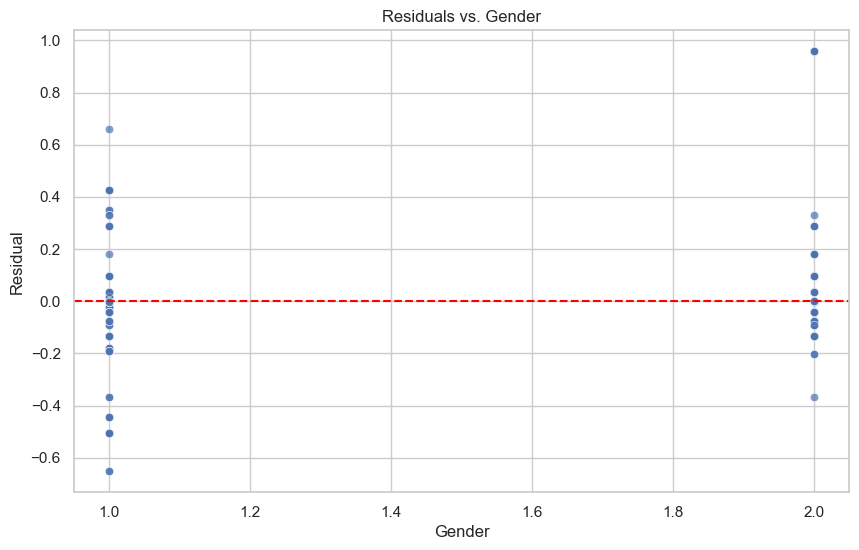

In [21]:
# -------------------------------------
# 6. Visualizing Commonalities Among Erroneous Samples
# -------------------------------------
feature_to_examine = residual_corr.abs().idxmax()  # The feature most correlated with residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis_df[feature_to_examine], y=error_analysis_df['Residual'], alpha=0.7)
plt.title(f"Residuals vs. {feature_to_examine}")
plt.xlabel(feature_to_examine)
plt.ylabel("Residual")
plt.axhline(0, color='red', linestyle='--')
plt.show()

### **Interpretation for *Residuals vs. Gender* Plot**

- **Pattern Observation**  
  - The scatterplot shows two distinct clusters at `Gender = 1` and `Gender = 2`.  
  - For `Gender = 1`, residuals range from strongly negative (overestimation) to moderately positive (underestimation).  
  - For `Gender = 2`, most residuals are **positive**, suggesting the model **underpredicts** more often when `Gender = 2`.

- **Key Observations**  
  - **Gender = 1**: The spread includes both underestimations (positive residuals) and overestimations (negative residuals).  
  - **Gender = 2**: Residuals tend to cluster **above zero**, indicating a consistent underestimation of the true value. Some points even approach residuals near 1.0, reflecting a notable gap between actual and predicted values.

- **Implications**  
  - A **positive correlation** between `Gender` and `Residual` aligns with the visual trend: as `Gender` goes from 1 to 2, residuals increase.  
  - This hints at a **systematic bias** wherein the model underpredicts outcomes for `Gender = 2`.  

In [22]:
# -------------------------------------
# Additional Considerations
# -------------------------------------
mean_residual = error_analysis_df['Residual'].mean()
if mean_residual > 0:
    print("On average, the model underestimates the target.")
elif mean_residual < 0:
    print("On average, the model overestimates the target.")
else:
    print("On average, the model is unbiased (mean residual ~ 0).")


common_overest_features = worst_overestimations.mean(numeric_only=True)
common_underest_features = worst_underestimations.mean(numeric_only=True)

print("\nAverage feature values of worst overestimates vs. entire test set:")
print("Overestimated samples mean:\n", common_overest_features)
print("\nEntire test set mean:\n", X_test.mean())

print("\nAverage feature values of worst underestimates vs. entire test set:")
print("Underestimated samples mean:\n", common_underest_features)
print("\nEntire test set mean:\n", X_test.mean())


On average, the model overestimates the target.

Average feature values of worst overestimates vs. entire test set:
Overestimated samples mean:
 index                       577.200000
Age                          26.600000
Gender                        1.000000
Air Pollution                 1.400000
Alcohol use                   3.400000
Dust Allergy                  3.200000
OccuPational Hazards          4.800000
Genetic Risk                  3.200000
chronic Lung Disease          5.600000
Balanced Diet                 2.800000
Obesity                       3.600000
Smoking                       3.200000
Passive Smoker                2.200000
Chest Pain                    4.200000
Coughing of Blood             4.400000
Fatigue                       4.400000
Weight Loss                   2.400000
Shortness of Breath           2.000000
Wheezing                      1.600000
Swallowing Difficulty         3.400000
Clubbing of Finger Nails      4.000000
Frequent Cold                 1.4000

## **Interpretation**

### **Key Findings**

1. **Overestimated Samples (Worst Overestimations)**  
   - On average, these samples have **lower** feature values relative to the entire test set:
     - **Age** = 26.6 vs. 36.57 (test set)  
     - **Air Pollution** = 1.4 vs. 3.87  
     - **Balanced Diet** = 2.8 vs. 4.63  
   - One major exception is **chronic Lung Disease (5.6)**, which is higher than the test set mean (4.58).  
   - **Actual** ≈ 0.40, **Predicted** ≈ 0.96, resulting in a **negative residual** (about -0.56) that reflects **overestimation**.

2. **Underestimated Samples (Worst Underestimations)**  
   - These samples tend to show **higher** feature values compared to the test set:
     - **Genetic Risk** = 6.0 vs. 4.67  
     - **chronic Lung Disease** = 5.8 vs. 4.58  
     - **Balanced Diet** = 5.8 vs. 4.63  
     - **Alcohol use** = 5.8 vs. 4.73  
   - **Actual** ≈ 1.80, **Predicted** ≈ 0.90, resulting in a **positive residual** (about +0.90) that indicates **underestimation**.

---

### **Comparative Analysis**

| Feature                  | Overestimated Mean | Underestimated Mean | Test Set Mean | Observation                                                   |
|--------------------------|--------------------|---------------------|---------------|---------------------------------------------------------------|
| Age                      | 26.60             | 35.00              | 36.57         | Overestimates: younger group<br>Underestimates: near average  |
| Genetic Risk             | 3.20              | 6.00               | 4.67          | Lower in overestimates, higher in underestimates              |
| chronic Lung Disease     | 5.60              | 5.80               | 4.58          | Overestimates *and* underestimates both above test mean       |
| Balanced Diet            | 2.80              | 5.80               | 4.63          | Much lower in overestimates, higher in underestimates         |
| Alcohol use              | 3.40              | 5.80               | 4.73          | Higher alcohol use among underestimated samples               |
| Actual                   | 0.40              | 1.80               | —             | Reflects the lower true values in overestimated samples       |
| Predicted                | 0.96              | 0.90               | —             | Overestimates yield higher predictions despite lower actual   |
| Residual                 | -0.56             | +0.90              | —             | Negative = Overestimate<br>Positive = Underestimate           |

---

### **Summary of Errors**
- **Overestimations** often occur in **younger** patients with generally **lower** risk factors—except for a notable spike in **chronic lung disease**—leading to a predicted value well above their actual (0.40 → 0.96).  
- **Underestimations** happen when multiple risk factors (**Genetic Risk**, **Chronic Lung Disease**, **Alcohol Use**) are **higher** than the test set average, causing the model to under-predict the actual (1.80 → 0.90).  

Overall, the model appears to **overestimate** for lower-average risk profiles (especially among younger ages) and **underestimate** when critical risk indicators are elevated. Adjusting how the model weights these contrasting profiles could help reduce systematic errors.


### References:
- Kaggle
- ChatGPT